In [1]:
from FeatureExtraction import *
import os
import pandas as pd
import numpy as np

In [2]:
data_dir = '/Users/jazlynn/Downloads/neurons-smr-format-sorted/'

results_dict = {'Filename': [],
                'firing rate': [],
                'ifr_mean': [],
                'ifr_skew': [],
                'ifr_kurtosis': [],
                'ifr_fano_factor': [],
                'baseline_amplitude': [],
                'peak_trough_amplitude': [],
                'waveform_duration': [],
                'waveform_halfwidth': [], # unlikely to use because of NaNs
                'waveform_PT_ratio': [],
                'waveform_TP_time': [],
                'waveform_positive_spiking': [],
                'ISI_mean': [],
                'ISI_skew': [],
                'ISI_kurtosis': [],
                'ISI_cv': [],
                'num_bursts': [], 
                'mean_surprise': [],
                'burst_index': [],
                'mean_burst_duration': [],
                'var_burst_duration': [],
                'mean_interburst_duration': [],
                'var_interburst_duration': [],
                'max_peak_freq': [],
                'delta_band': [],
                'theta_band': [],
                'alpha_band': [],
                'beta_band': [],
                'gamma_band': [],
                'delta_band_freq': [],
                'theta_band_freq': [],
                'delta_band_magnitude': [],
                'theta_band_magnitude': []}

for file in os.listdir(data_dir):
    if file.endswith('.smr'):
        analogsignal, spike_times, sampling_frequency, time = load_spiketrain(os.path.join(data_dir,file))
        results_dict['Filename'].append(file)
        
        results_dict['firing rate'].append(get_firing_rate(spike_times, analogsignal, sampling_frequency))
        ifr_ls, time_bins = calculate_instantaneous_firing_rate(spike_times, analogsignal, sampling_frequency, 0.05, 0.1)
        fano_factor, ifr_mean, ifr_skew, ifr_kurtosis = get_ifr_metrics(ifr_ls)
        results_dict['ifr_mean'].append(ifr_mean)
        results_dict['ifr_skew'].append(ifr_skew)
        results_dict['ifr_kurtosis'].append(ifr_kurtosis)
        results_dict['ifr_fano_factor'].append(fano_factor)
        
        peak_trough_amplitude, _ = get_mean_amplitude(spike_times, analogsignal, sampling_frequency, 25)
        baseline_amplitude, _ = get_mean_amplitude2(spike_times, analogsignal, sampling_frequency, 25)
        waveform_duration, waveform_halfwidth, waveform_PT_ratio, waveform_TP_time, waveform_positive_spiking = get_ecephys_waveform_metrics(spike_times, analogsignal, 25, sampling_frequency)
        results_dict['baseline_amplitude'].append(baseline_amplitude)
        results_dict['peak_trough_amplitude'].append(peak_trough_amplitude)
        
        results_dict['waveform_duration'].append(waveform_duration)
        results_dict['waveform_halfwidth'].append(waveform_halfwidth)
        results_dict['waveform_PT_ratio'].append(waveform_PT_ratio)
        results_dict['waveform_TP_time'].append(waveform_TP_time)
        results_dict['waveform_positive_spiking'].append(waveform_positive_spiking)
        
        ISI_cv, ISI_skew, ISI_kurtosis, ISI_mean, ISI_mode = get_ISI_metrics(spike_times)
        results_dict['ISI_cv'].append(ISI_cv)
        results_dict['ISI_skew'].append(ISI_skew)
        results_dict['ISI_kurtosis'].append(ISI_kurtosis)
        results_dict['ISI_mean'].append(ISI_mean)
        
        burst_dict = burst_detection_neuroexplorer(spike_times, 
                                                   analogsignal, 
                                                   sampling_frequency, 
                                                   min_surprise = 5, 
                                                   min_numspikes = 3)
        num_bursts, mean_surprise, burst_index, mean_burst_duration, var_burst_duration, mean_interburst_duration, var_interburst_duration = get_burst_metrics(burst_dict, spike_times)
        results_dict['num_bursts'].append(num_bursts)
        results_dict['mean_surprise'].append(mean_surprise)
        results_dict['burst_index'].append(burst_index)
        results_dict['mean_burst_duration'].append(mean_burst_duration)
        results_dict['var_burst_duration'].append(var_burst_duration)
        results_dict['mean_interburst_duration'].append(mean_interburst_duration)
        results_dict['var_interburst_duration'].append(var_interburst_duration)
        
        max_peak_freq, freq_peaks, peak_bands, freq_magnitude = get_synchrony_features(spike_times, 
                                                                                       time_bin_size = 0.01, 
                                                                                       max_lag_time = 0.5, 
                                                                                       avg_window_size = 5,
                                                                                       significance_level = 0.05, 
                                                                                       to_plot = False)
        results_dict['max_peak_freq'].append(max_peak_freq)
        results_dict['delta_band'].append(peak_bands.count('delta'))
        results_dict['theta_band'].append(peak_bands.count('theta'))
        results_dict['alpha_band'].append(peak_bands.count('alpha'))
        results_dict['beta_band'].append(peak_bands.count('beta'))
        results_dict['gamma_band'].append(peak_bands.count('gamma'))
        
        # only have delta and theta bands (expected)
        if len(freq_peaks) > 0:
            results_dict['delta_band_freq'].append(np.squeeze([i for i in freq_peaks if 0.1 <= i < 4]))
            results_dict['theta_band_freq'].append(np.squeeze([i for i in freq_peaks if 4 <= i < 8]))
        else:
            results_dict['delta_band_freq'].append(0)
            results_dict['theta_band_freq'].append(0)
        
        if len(freq_magnitude) > 0:
            results_dict['delta_band_magnitude'].append(np.squeeze([freq_magnitude[i] for i,val in enumerate(freq_peaks) if 0.1 <= val < 4]))
            results_dict['theta_band_magnitude'].append(np.squeeze([freq_magnitude[i] for i,val in enumerate(freq_peaks) if 4 <= val < 8]))
        else:
            results_dict['delta_band_magnitude'].append(0)
            results_dict['theta_band_magnitude'].append(0)
        
        
results_df = pd.DataFrame(results_dict)
results_df.head()
results_df.to_csv('ExtractedFeatures_v2.csv')

/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/

### Model Training

In [3]:
metadata = pd.read_csv('/Users/jazlynn/Downloads/bme1500-project-5-metadata.csv')
metadata

,Filename,Patient ID,Target,Neuron,Hemisphere
0,neuron_001.smr,1,STN,STN,R
1,neuron_002.smr,2,GPi,BOR,L
2,neuron_003.smr,3,GPi,BOR,R
3,neuron_004.smr,3,GPi,BOR,L
4,neuron_005.smr,3,GPi,BOR,L
...,...,...,...,...,...
355,neuron_356.smr,143,STN,STN,R
356,neuron_357.smr,143,STN,SNr,R
357,neuron_358.smr,144,STN,SNr,L
358,neuron_359.smr,145,STN,STN,R


In [4]:
results_df = pd.read_csv('ExtractedFeatures_v2.csv')

print(results_df.isnull().any())
results_df.fillna(0,inplace=True)

combined_data = pd.merge(metadata, results_df,on='Filename')
combined_data

Unnamed: 0                   False
Filename                     False
firing rate                  False
ifr_mean                     False
ifr_skew                     False
ifr_kurtosis                 False
ifr_fano_factor              False
baseline_amplitude           False
peak_trough_amplitude        False
waveform_duration            False
waveform_halfwidth            True
waveform_PT_ratio            False
waveform_TP_time             False
waveform_positive_spiking    False
ISI_mean                     False
ISI_skew                     False
ISI_kurtosis                 False
ISI_cv                       False
num_bursts                   False
mean_surprise                 True
burst_index                  False
mean_burst_duration           True
var_burst_duration            True
mean_interburst_duration      True
var_interburst_duration       True
max_peak_freq                 True
delta_band                   False
theta_band                   False
alpha_band          

,Filename,Patient ID,Target,Neuron,Hemisphere,Unnamed: 0,firing rate,ifr_mean,ifr_skew,ifr_kurtosis,...,max_peak_freq,delta_band,theta_band,alpha_band,beta_band,gamma_band,delta_band_freq,theta_band_freq,delta_band_magnitude,theta_band_magnitude
0,neuron_001.smr,1,STN,STN,R,300,13.520379,13.469388,1.020497,-0.052522,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.087242,0.020579
1,neuron_002.smr,2,GPi,BOR,L,317,35.229484,35.046154,-0.017229,-0.250216,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.163782,0.049172
2,neuron_003.smr,3,GPi,BOR,R,314,18.319115,18.237179,0.172007,-0.105805,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.090107,0.040045
3,neuron_004.smr,3,GPi,BOR,L,352,16.787130,16.759142,0.123386,-0.008873,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.102068,0.035840
4,neuron_005.smr,3,GPi,BOR,L,351,10.208298,10.153374,0.343673,-0.355903,...,2.969697,1,1,0,0,0,2.969697,5.393939,0.038644,0.012286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,neuron_356.smr,143,STN,STN,R,17,54.666667,54.500000,0.267870,0.560545,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.085823,0.034168
356,neuron_357.smr,143,STN,SNr,R,6,63.066667,62.933333,0.774957,0.042015,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.137768,0.036451
357,neuron_358.smr,144,STN,SNr,L,329,133.600000,133.533333,-0.154999,0.141760,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.101890,0.031467
358,neuron_359.smr,145,STN,STN,R,340,60.076461,59.403974,0.301433,0.545548,...,2.969697,1,1,0,0,0,2.969697,4.909091,0.088075,0.035464


In [13]:
features = results_df.columns
features = features.drop(['Filename','alpha_band','beta_band','gamma_band','Unnamed: 0','delta_band', 'theta_band',
       'delta_band_freq', 'theta_band_freq','waveform_halfwidth','waveform_positive_spiking'])
print(features)

Index(['firing rate', 'ifr_mean', 'ifr_skew', 'ifr_kurtosis',
       'ifr_fano_factor', 'baseline_amplitude', 'peak_trough_amplitude',
       'waveform_duration', 'waveform_PT_ratio', 'waveform_TP_time',
       'ISI_mean', 'ISI_skew', 'ISI_kurtosis', 'ISI_cv', 'num_bursts',
       'mean_surprise', 'burst_index', 'mean_burst_duration',
       'var_burst_duration', 'mean_interburst_duration',
       'var_interburst_duration', 'max_peak_freq', 'delta_band_magnitude',
       'theta_band_magnitude'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(combined_data[features],
                                                    combined_data['Neuron'],
                                                    stratify=combined_data['Neuron'],
                                                    test_size=0.2, random_state=42)

print('distribution in full dataset: ', np.unique(combined_data['Neuron'], return_counts=True))
print('distribution in test set: ', np.unique(y_test, return_counts=True))

RF = RandomForestClassifier(n_estimators=250, random_state=42)
RF.fit(X_train, y_train)
train_pred = RF.predict(X_train)
test_pred = RF.predict(X_test)

print('train precision:', precision_score(y_train,train_pred,average=None))
print('train recall:', recall_score(y_train,train_pred,average=None))
print('train f1:', f1_score(y_train,train_pred,average=None))
matrix = confusion_matrix(y_train, train_pred)
print('train accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('test precision:', precision_score(y_test,test_pred,average=None))
print('test recall:', recall_score(y_test,test_pred,average=None))
print('test f1:', f1_score(y_test,test_pred,average=None))
matrix = confusion_matrix(y_test, test_pred)
print('test accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('macro averaged')
print('train precision:', precision_score(y_train,train_pred,average='macro'))
print('train recall:', recall_score(y_train,train_pred,average='macro'))
print('train f1:', f1_score(y_train,train_pred,average='macro'))
print('train accuracy', accuracy_score(y_train,train_pred))

print('test precision:', precision_score(y_test,test_pred,average='macro'))
print('test recall:', recall_score(y_test,test_pred,average='macro'))
print('test f1:', f1_score(y_test,test_pred,average='macro'))
print('test accuracy', accuracy_score(y_test,test_pred))

distribution in full dataset:  (array(['BOR', 'HFD', 'SNr', 'STN'], dtype=object), array([90, 90, 90, 90]))
distribution in test set:  (array(['BOR', 'HFD', 'SNr', 'STN'], dtype=object), array([18, 18, 18, 18]))
train precision: [1. 1. 1. 1.]
train recall: [1. 1. 1. 1.]
train f1: [1. 1. 1. 1.]
train accuracy: [1. 1. 1. 1.]
test precision: [0.65217391 0.81818182 0.73913043 0.8       ]
test recall: [0.83333333 0.5        0.94444444 0.66666667]
test f1: [0.73170732 0.62068966 0.82926829 0.72727273]
test accuracy: [0.83333333 0.5        0.94444444 0.66666667]
macro averaged
train precision: 1.0
train recall: 1.0
train f1: 1.0
train accuracy 1.0
test precision: 0.7523715415019763
test recall: 0.736111111111111
test f1: 0.7272344980503097
test accuracy 0.7361111111111112


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

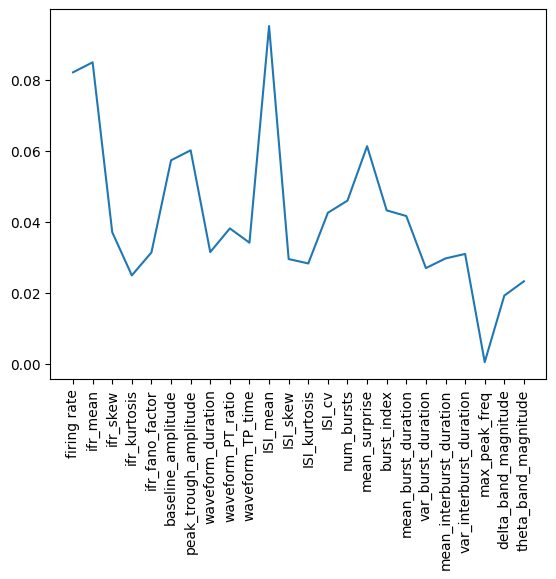

In [15]:
plt.plot(features, RF.feature_importances_)
plt.xticks(rotation=90)

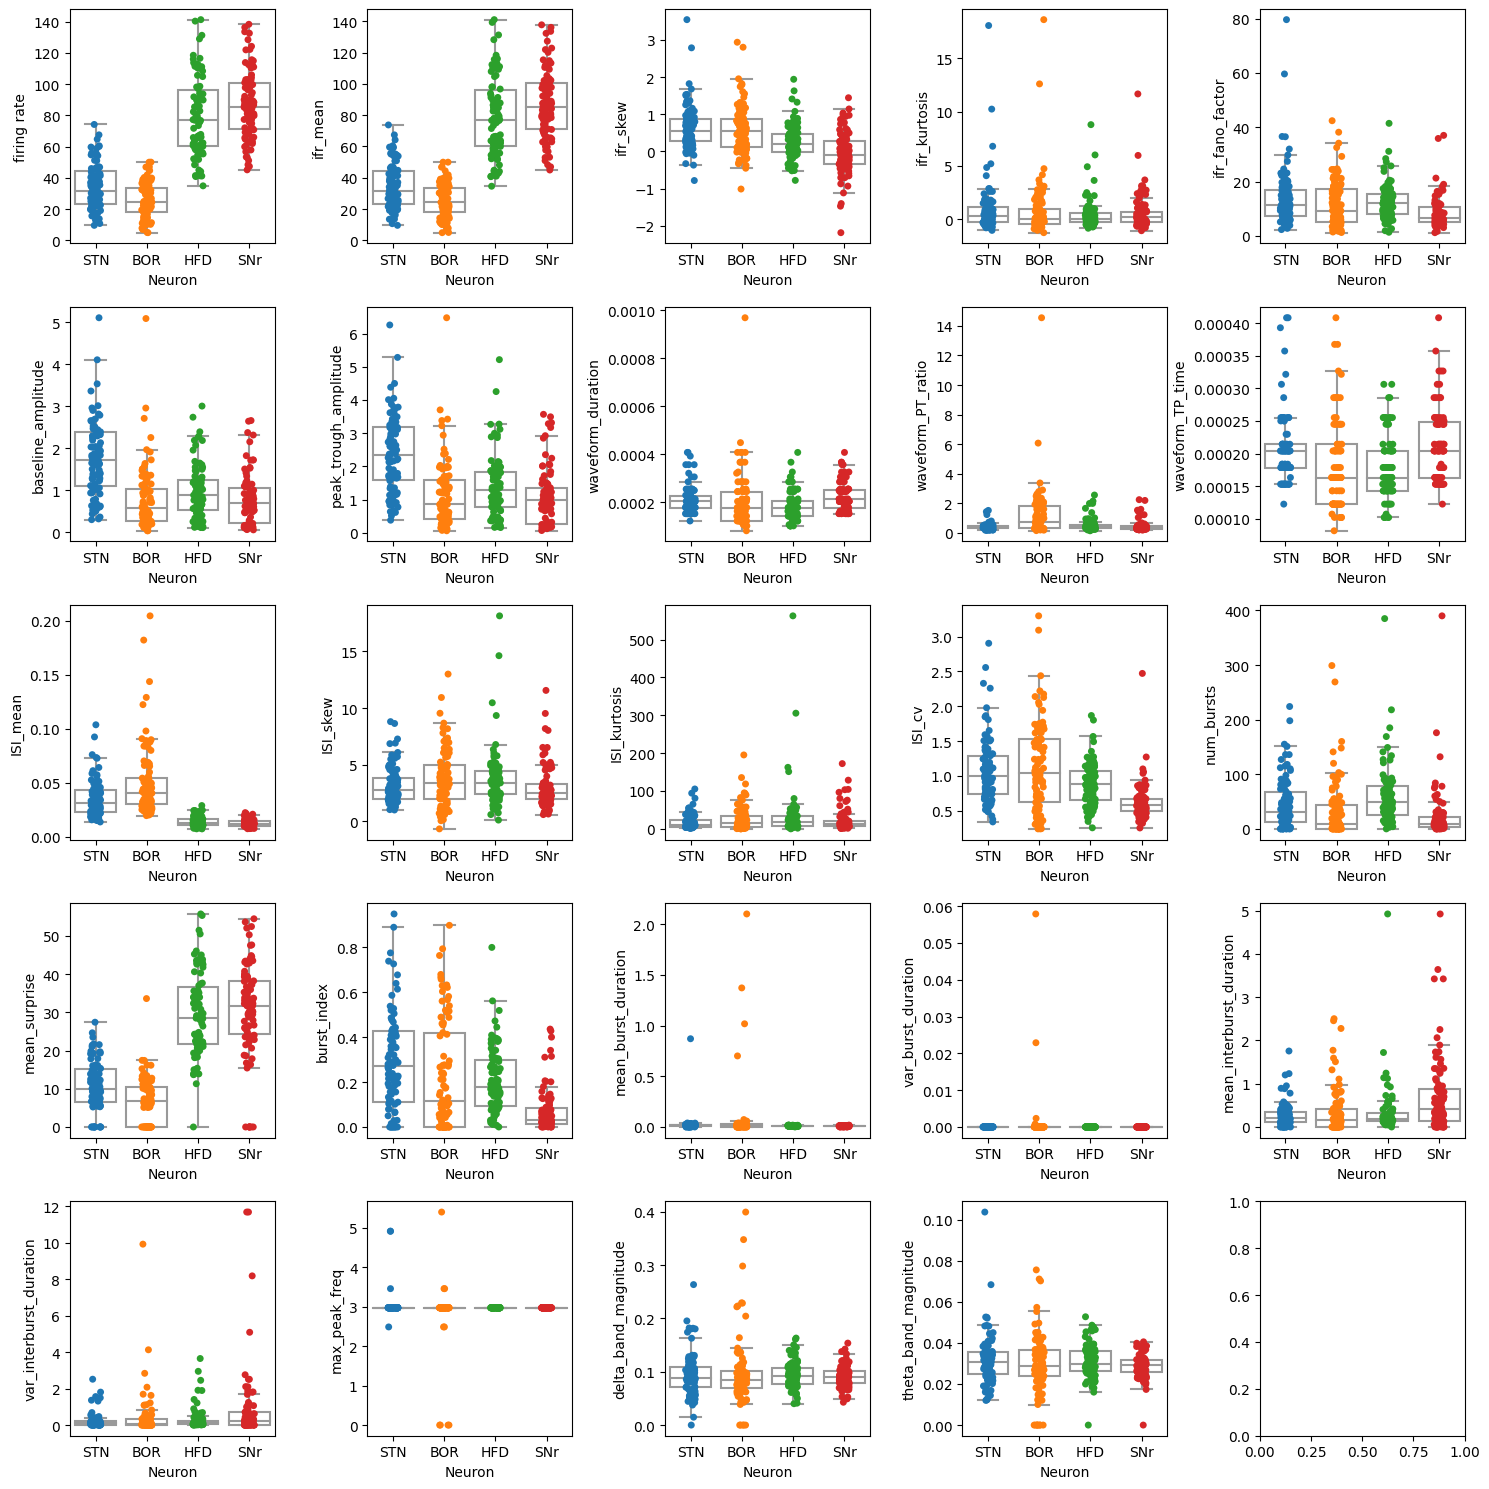

In [17]:
import seaborn as sns

fig,axes=plt.subplots(5,5,figsize=(15,15))
axes = axes.ravel()
for i, feat in enumerate(features):
    sns.boxplot(combined_data,x='Neuron',y=feat,ax=axes[i],showfliers=False,color='white')
    sns.stripplot(combined_data, x='Neuron', y=feat,ax=axes[i],hue='Neuron',legend=False)

fig.tight_layout()

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42, max_iter=200)
LR.fit(X_train, y_train)
LR_train_pred = LR.predict(X_train)
LR_test_pred = LR.predict(X_test)

print('train precision:', precision_score(y_train,LR_train_pred,average=None))
print('train recall:', recall_score(y_train,LR_train_pred,average=None))
print('train f1:', f1_score(y_train,LR_train_pred,average=None))
matrix = confusion_matrix(y_train, LR_train_pred)
print('train accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('test precision:', precision_score(y_test,LR_test_pred,average=None))
print('test recall:', recall_score(y_test,LR_test_pred,average=None))
print('test f1:', f1_score(y_test,LR_test_pred,average=None))
matrix = confusion_matrix(y_test, LR_test_pred)
print('test accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('macro averaged')
print('train precision:', precision_score(y_train,LR_train_pred,average='macro'))
print('train recall:', recall_score(y_train,LR_train_pred,average='macro'))
print('train f1:', f1_score(y_train,LR_train_pred,average='macro'))
print('train accuracy', accuracy_score(y_train,LR_train_pred))

print('test precision:', precision_score(y_test,LR_test_pred,average='macro'))
print('test recall:', recall_score(y_test,LR_test_pred,average='macro'))
print('test f1:', f1_score(y_test,LR_test_pred,average='macro'))
print('test accuracy', accuracy_score(y_test,LR_test_pred))

train precision: [0.76388889 0.64383562 0.73913043 0.67567568]
train recall: [0.76388889 0.65277778 0.70833333 0.69444444]
train f1: [0.76388889 0.64827586 0.72340426 0.68493151]
train accuracy: [0.76388889 0.65277778 0.70833333 0.69444444]
test precision: [0.71428571 0.57142857 0.6        0.63157895]
test recall: [0.83333333 0.22222222 0.83333333 0.66666667]
test f1: [0.76923077 0.32       0.69767442 0.64864865]
test accuracy: [0.83333333 0.22222222 0.83333333 0.66666667]
macro averaged
train precision: 0.7056326539463822
train recall: 0.7048611111111112
train f1: 0.7051251282815797
train accuracy 0.7048611111111112
test precision: 0.6293233082706766
test recall: 0.6388888888888888
test f1: 0.6088884591210173
test accuracy 0.6388888888888888


/Users/jazlynn/opt/anaconda3/envs/NP/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:

from sklearn.svm import SVC
svm_clf = SVC(gamma='auto',random_state=42)
svm_clf.fit(X_train, y_train)

SVM_train_pred = svm_clf.predict(X_train)
SVM_test_pred = svm_clf.predict(X_test)

print('train precision:', precision_score(y_train,SVM_train_pred,average=None))
print('train recall:', recall_score(y_train,SVM_train_pred,average=None))
print('train f1:', f1_score(y_train,SVM_train_pred,average=None))
matrix = confusion_matrix(y_train, SVM_train_pred)
print('train accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('test precision:', precision_score(y_test,SVM_test_pred,average=None))
print('test recall:', recall_score(y_test,SVM_test_pred,average=None))
print('test f1:', f1_score(y_test,SVM_test_pred,average=None))
matrix = confusion_matrix(y_test, SVM_test_pred)
print('test accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('macro averaged')
print('train precision:', precision_score(y_train,SVM_train_pred,average='macro'))
print('train recall:', recall_score(y_train,SVM_train_pred,average='macro'))
print('train f1:', f1_score(y_train,SVM_train_pred,average='macro'))
print('train accuracy', accuracy_score(y_train,SVM_train_pred))

print('test precision:', precision_score(y_test,SVM_test_pred,average='macro'))
print('test recall:', recall_score(y_test,SVM_test_pred,average='macro'))
print('test f1:', f1_score(y_test,SVM_test_pred,average='macro'))
print('test accuracy', accuracy_score(y_test,SVM_test_pred))

train precision: [0.98630137 1.         1.         1.        ]
train recall: [1.         1.         1.         0.98611111]
train f1: [0.99310345 1.         1.         0.99300699]
train accuracy: [1.         1.         1.         0.98611111]
test precision: [0.33333333 0.31818182 0.6        0.5       ]
test recall: [0.22222222 0.77777778 0.33333333 0.16666667]
test f1: [0.26666667 0.4516129  0.42857143 0.25      ]
test accuracy: [0.22222222 0.77777778 0.33333333 0.16666667]
macro averaged
train precision: 0.9965753424657534
train recall: 0.9965277777777778
train f1: 0.9965276103207138
train accuracy 0.9965277777777778
test precision: 0.43787878787878787
test recall: 0.375
test f1: 0.3492127496159754
test accuracy 0.375


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.005, max_depth=None, random_state=42,verbose=2).fit(X_train, y_train)

GBDT_train_pred = GBDT.predict(X_train)
GBDT_test_pred = GBDT.predict(X_test)

print('train precision:', precision_score(y_train,GBDT_train_pred,average=None))
print('train recall:', recall_score(y_train,GBDT_train_pred,average=None))
print('train f1:', f1_score(y_train,GBDT_train_pred,average=None))
matrix = confusion_matrix(y_train, GBDT_train_pred)
print('train accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('test precision:', precision_score(y_test,GBDT_test_pred,average=None))
print('test recall:', recall_score(y_test,GBDT_test_pred,average=None))
print('test f1:', f1_score(y_test,GBDT_test_pred,average=None))
matrix = confusion_matrix(y_test, GBDT_test_pred)
print('test accuracy:', matrix.diagonal()/matrix.sum(axis=1))

print('macro averaged')
print('train precision:', precision_score(y_train,GBDT_train_pred,average='macro'))
print('train recall:', recall_score(y_train,GBDT_train_pred,average='macro'))
print('train f1:', f1_score(y_train,GBDT_train_pred,average='macro'))
print('train accuracy', accuracy_score(y_train,GBDT_train_pred))

print('test precision:', precision_score(y_test,GBDT_test_pred,average='macro'))
print('test recall:', recall_score(y_test,GBDT_test_pred,average='macro'))
print('test f1:', f1_score(y_test,GBDT_test_pred,average='macro'))
print('test accuracy', accuracy_score(y_test,GBDT_test_pred))

      Iter       Train Loss   Remaining Time 
         1           1.3713           11.34s
         2           1.3566           10.91s
         3           1.3421           11.20s
         4           1.3279           10.47s
         5           1.3139           10.17s
         6           1.3001            9.88s
         7           1.2865            9.79s
         8           1.2731            9.61s
         9           1.2600            9.44s
        10           1.2470            9.28s
        11           1.2342            9.13s
        12           1.2217            9.10s
        13           1.2093            9.07s
        14           1.1970            9.00s
        15           1.1850            8.90s
        16           1.1731            8.86s
        17           1.1614            8.77s
        18           1.1499            8.70s
        19           1.1385            8.65s
        20           1.1273            8.58s
        21           1.1162            8.52s
        2

In [29]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RF, n_features_to_select=23, step=1, verbose=2)
rfe.fit(X_train, y_train)
print(rfe.get_feature_names_out())
print(rfe.ranking_)
print(accuracy_score(y_test,rfe.predict(X_test)))



Fitting estimator with 24 features.
['firing rate' 'ifr_mean' 'ifr_skew' 'ifr_kurtosis' 'ifr_fano_factor'
 'baseline_amplitude' 'peak_trough_amplitude' 'waveform_duration'
 'waveform_PT_ratio' 'waveform_TP_time' 'ISI_mean' 'ISI_skew'
 'ISI_kurtosis' 'ISI_cv' 'num_bursts' 'mean_surprise' 'burst_index'
 'mean_burst_duration' 'var_burst_duration' 'mean_interburst_duration'
 'var_interburst_duration' 'delta_band_magnitude' 'theta_band_magnitude']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]
0.7222222222222222


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

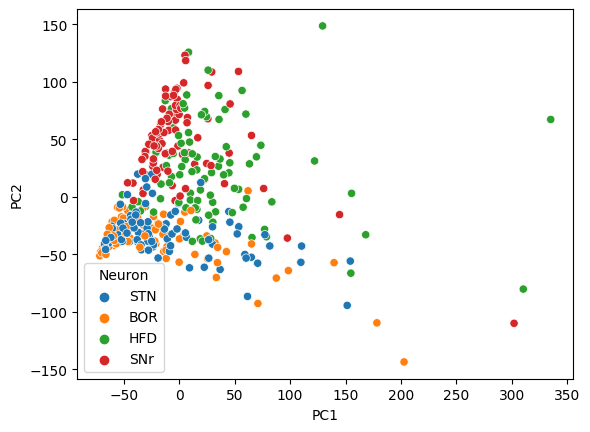

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_features = pca.fit_transform(combined_data[features])

pcd_df = pd.DataFrame(pca_features, columns=['PC' + str(i) for i in range(1,6)])
pcd_df['Neuron'] = combined_data['Neuron']

sns.scatterplot(pcd_df,x='PC1',y='PC2',hue='Neuron')